### 线性回归的正则化
- The L1 regularization (also called Lasso)
- The L2 regularization (also called Ridge)
- The L1/L2 regularization (also called Elastic net)

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

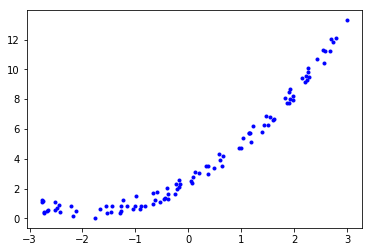

In [12]:
m = 100
X = 6 * np.random.rand(100, 1) - 3 # x的取值范围
y = 2*X + 0.5*X*X + np.random.rand(100, 1) + 2  #y = 0.5x^2 + 2x + 2 
plt.plot(X, y, "b.")
plt.show()

#### 代价函数的计算

In [8]:
def L_theta(theta, X_x0, y):
    delta = np.dot(X_x0, theta) - y  # np.dot 表示矩阵乘法
    L_theta = np.sum(np.multiply(delta, delta))
    return L_theta

### Reference

- http://enhancedatascience.com/2017/07/04/machine-learning-explained-regularization/
- https://www.youtube.com/watch?v=TmzzQoO8mr4 (cost函数的作用，L1与L2的解，L1的解不稳定)